In [403]:
using JLD2
using StatsPlots
using Plots
using KernelDensity
using Plots.PlotMeasures
pal = palette(:tab10);

In [448]:
trajectories_f = jldopen("trajectories_1pt_500_3.jld2", "r")
trajectories = read(trajectories_f, "trajectories");

In [449]:
max_x = maximum(maximum(trajectories, dims=2))
min_x = minimum(minimum(trajectories, dims=2))

-1.0764763968181035

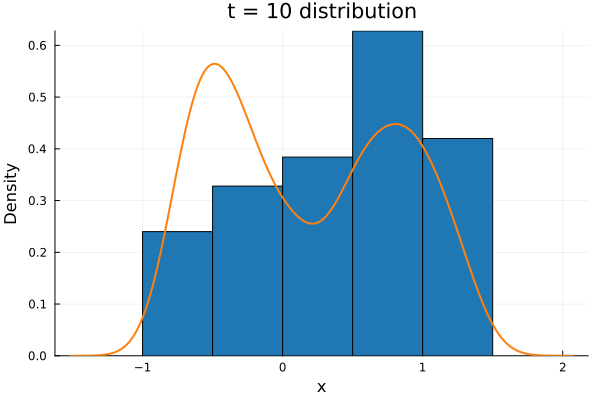

In [450]:
t_pt = 10
t_kde = kde(trajectories[:, t_pt]);
histogram(trajectories[:, t_pt], label="", normalize=:pdf, c=pal[1])
plot!(t_kde.x, t1_kde.density, label="", c=pal[2], lw=2, title="t = $t_pt distribution", xlabel="x", ylabel="Density")

construct a matrix of KDEs

In [451]:
kde_vals = []
x_vals = []
for t in 1:size(trajectories, 2)
    kde_v = kde(trajectories[:, t]; boundary=(min_x, max_x), npoints=5000)
    push!(kde_vals, kde_v.density)
    push!(x_vals, kde_v.x)
end
kde_matrix = hcat(kde_vals...)';
#kde_matrix[1, :] = zeros(size(kde_matrix, 2)) # conditionined on first point, so density will be peaked at a single value and skew the colour scale
#kde_matrix[1, :]
xval_matrix = hcat(x_vals...)';

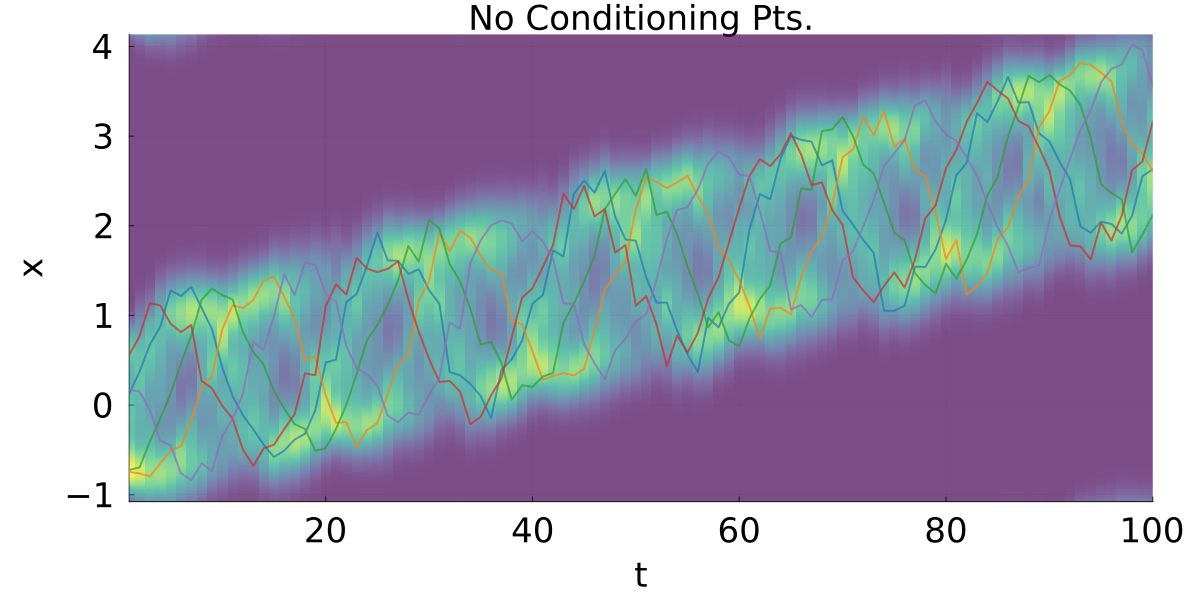

In [455]:
fstyle = font("sans-serif", 23)
heatmap(collect(1:100), xval_matrix[1, :], kde_matrix', c=:viridis, 
    alpha=0.7, colorbar=:none, xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x, max_x),
    title="No Conditioning Pts.",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories[42, :], label="", c=pal[1], lw=2, alpha=0.69)
plot!(trajectories[21, :], label="", c=pal[2], lw=2,alpha=0.69)
plot!(trajectories[12, :], label="", c=pal[3], lw=2,alpha=0.69)
plot!(trajectories[150, :], label="", c=pal[4], lw=2,alpha=0.69)
plot!(trajectories[250, :], label="", c=pal[5], lw=2,alpha=0.69)
#savefig("./simple_trendy_sinusoid_no_cond_pts_heatmap.svg")

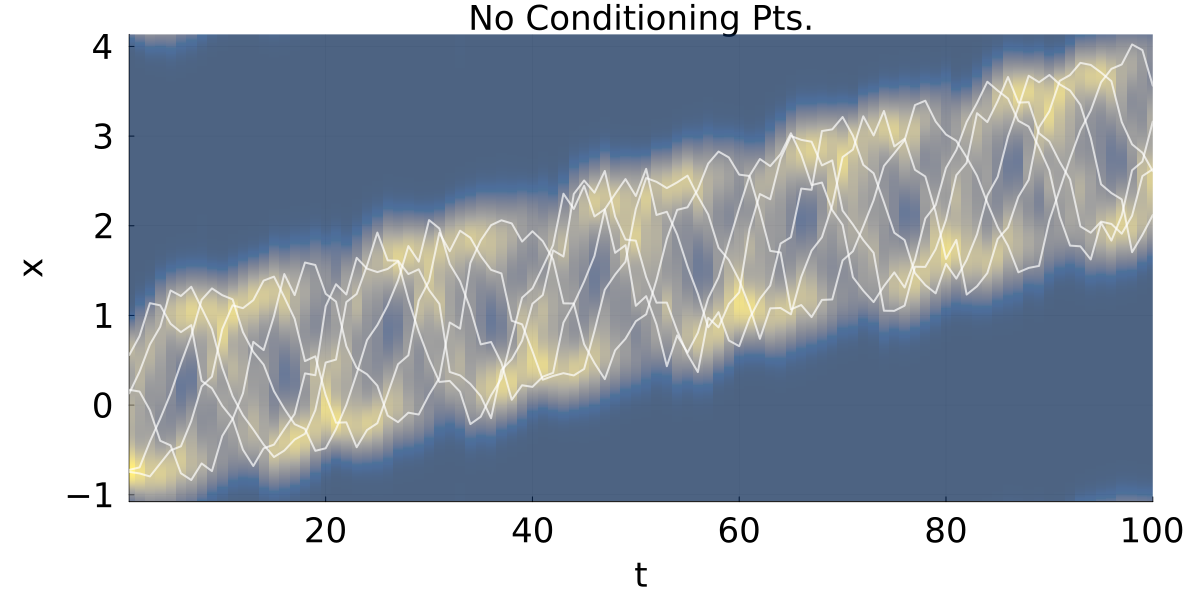

In [523]:
fstyle = font("sans-serif", 23)
heatmap(collect(1:100), xval_matrix[1, :], kde_matrix', c=:cividis, 
    alpha=0.7, colorbar=:none, xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x, max_x),
    title="No Conditioning Pts.",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories[42, :], label="", c=:white, lw=2, alpha=0.69)
plot!(trajectories[21, :], label="", c=:white, lw=2,alpha=0.69)
plot!(trajectories[12, :], label="", c=:white, lw=2,alpha=0.69)
plot!(trajectories[150, :], label="", c=:white, lw=2,alpha=0.69)
plot!(trajectories[250, :], label="", c=:white, lw=2,alpha=0.69)
#savefig("./simple_trendy_sinusoid_no_cond_pts_heatmap_style3.svg")

Overplotting trajectories

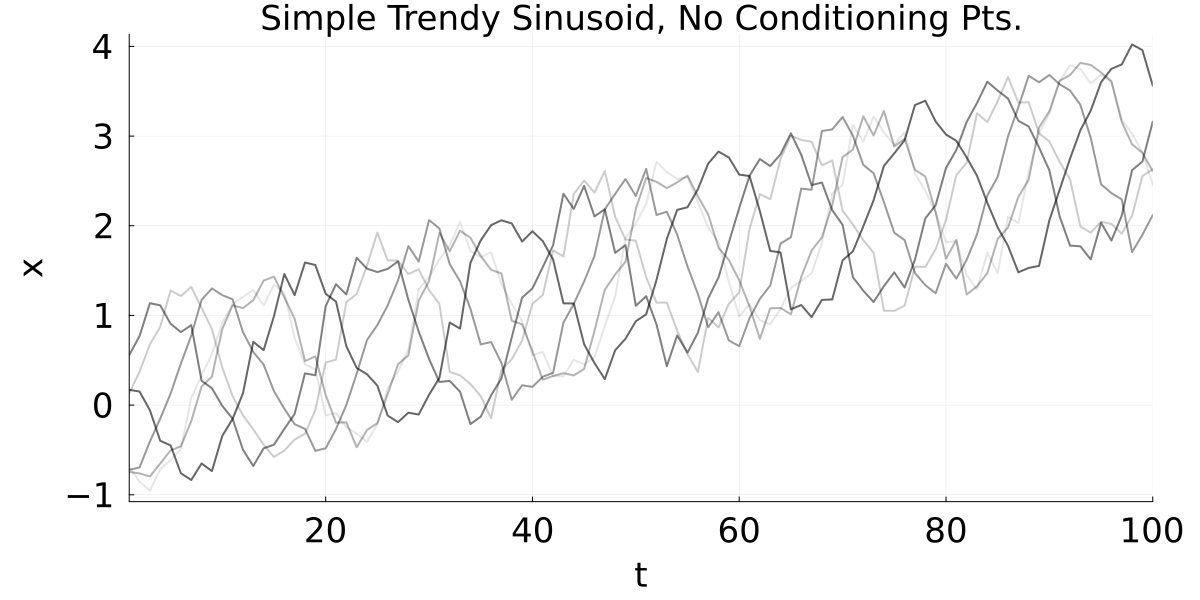

In [525]:
plot(trajectories[1, :], label="", alpha=0.1, c=:black, lw=2,
    title="Simple Trendy Sinusoid, No Conditioning Pts.", xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x, max_x),
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories[42, :], label="", c=:black, lw=2, alpha=0.2)
plot!(trajectories[21, :], label="", c=:black, lw=2,alpha=0.3)
plot!(trajectories[12, :], label="", c=:black, lw=2,alpha=0.4)
plot!(trajectories[150, :], label="", c=:black, lw=2,alpha=0.5)
plot!(trajectories[250, :], label="", c=:black, lw=2,alpha=0.6)
#savefig("./simple_trendy_sinusoid_no_cond_pts_heatmap_style4.svg")

In [548]:
lpaz = palette(:managua10)

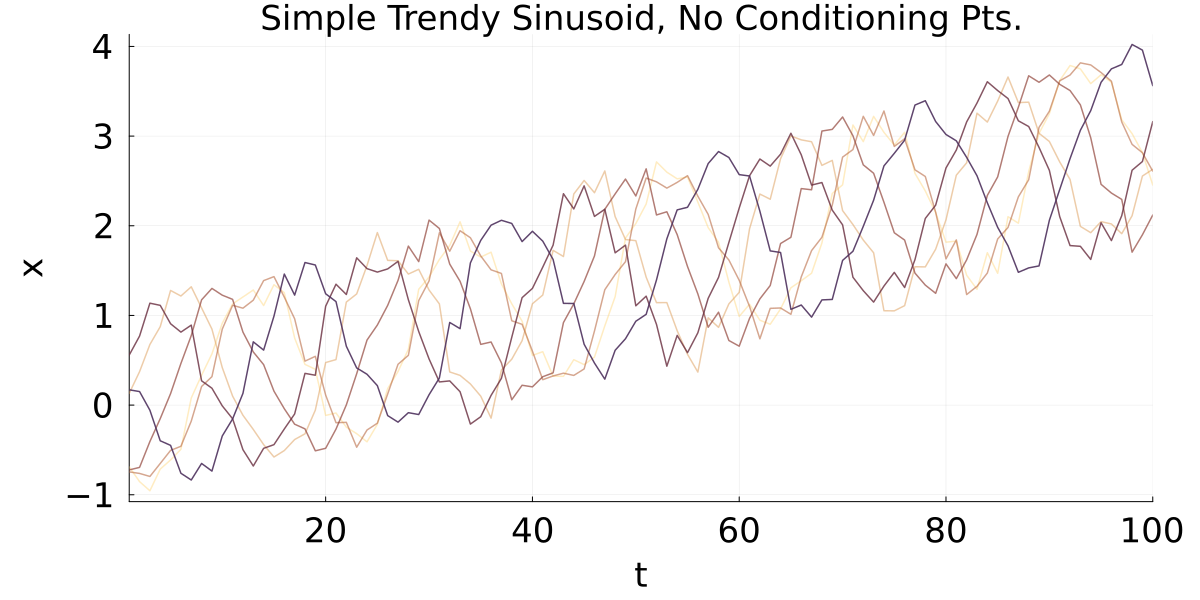

In [553]:
plot(trajectories[1, :], label="", alpha=0.4, c=lpaz[1], lw=1.5,
    title="Simple Trendy Sinusoid, No Conditioning Pts.", xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x, max_x),
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories[42, :], label="", c=lpaz[2], lw=1.5, alpha=0.5)
plot!(trajectories[21, :], label="", c=lpaz[3], lw=1.5,alpha=0.6)
plot!(trajectories[12, :], label="", c=lpaz[4], lw=1.5,alpha=0.7)
plot!(trajectories[150, :], label="", c=lpaz[5], lw=1.5,alpha=0.8)
plot!(trajectories[250, :], label="", c=lpaz[6], lw=1.5,alpha=0.9)
#savefig("./simple_trendy_sinusoid_no_cond_pts_heatmap_style5.svg")

In [456]:
trajectories_f_15 = jldopen("trajectories_14pt_500.jld2", "r")
trajectories_15 = read(trajectories_f_15, "trajectories");
max_x_15 = maximum(maximum(trajectories_15, dims=2))
min_x_15 = minimum(minimum(trajectories_15, dims=2))

-0.9743582533159038

In [457]:
kde_vals_15 = []
x_vals_15 = []
for t in 1:size(trajectories_15, 2)
    kde_v = kde(trajectories_15[:, t]; boundary=(min_x_15, max_x_15), npoints=5000)
    push!(kde_vals_15, kde_v.density)
    push!(x_vals_15, kde_v.x)
end
kde_matrix_15 = hcat(kde_vals_15...)';
kde_matrix_15[1:14, :] = zeros(14, size(kde_matrix, 2)) # conditionined on first 14 points, so density will skew the colour scale
xval_matrix_15 = hcat(x_vals_15...)';

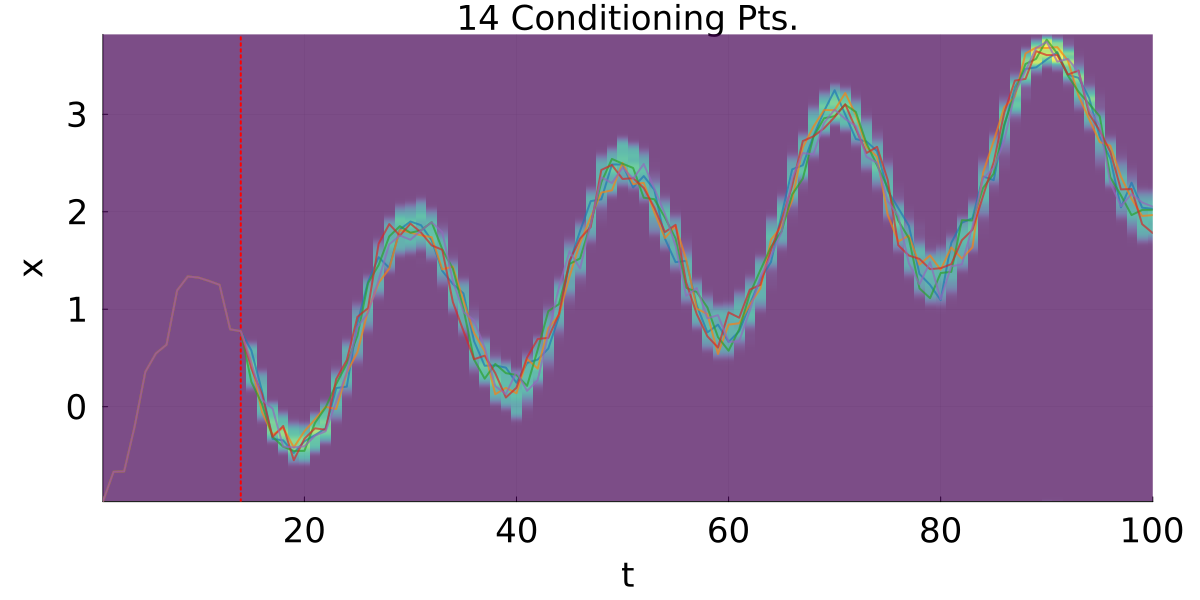

In [459]:
fstyle = font("sans-serif", 23)
heatmap(collect(1:100), xval_matrix_15[1, :], kde_matrix_15', c=:viridis, 
    alpha=0.7, colorbar=:none, xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x_15, max_x_15),
    title="14 Conditioning Pts.",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
vline!([14], ls=:dot, c=:red, lw=2, label="")
plot!(trajectories_15[42, :], label="", c=pal[1], lw=2, alpha=0.69)
plot!(trajectories_15[21, :], label="", c=pal[2], lw=2,alpha=0.69)
plot!(trajectories_15[12, :], label="", c=pal[3], lw=2,alpha=0.69)
plot!(trajectories_15[150, :], label="", c=pal[4], lw=2,alpha=0.69)
plot!(trajectories_15[250, :], label="", c=pal[5], lw=2,alpha=0.69)
#savefig("./simple_trendy_sinusoid_14_cond_pts_heatmap.svg")

In [621]:
trajectories_f_difficult = jldopen("trajectories_difficult_sinusoid_1000.jld2", "r")
trajectories_difficult = read(trajectories_f_difficult, "trajectories");
max_x_difficult = maximum(maximum(trajectories_difficult, dims=2))
min_x_difficult = minimum(minimum(trajectories_difficult, dims=2))

-4.191619440011327

In [622]:
kde_vals_difficult = []
x_vals_difficult = []
for t in 1:size(trajectories_difficult, 2)
    kde_v = kde(trajectories_difficult[:, t]; boundary=(min_x_difficult, max_x_difficult), npoints=5000)
    push!(kde_vals_difficult, kde_v.density)
    push!(x_vals_difficult, kde_v.x)
end
kde_matrix_difficult = hcat(kde_vals_difficult...)';
#kde_matrix_difficult[1:14, :] = zeros(14, size(kde_matrix, 2)) # conditionined on first 14 points, so density will skew the colour scale
xval_matrix_difficult = hcat(x_vals_difficult...)';

overplotting - maybe 2 or 3 of each trend

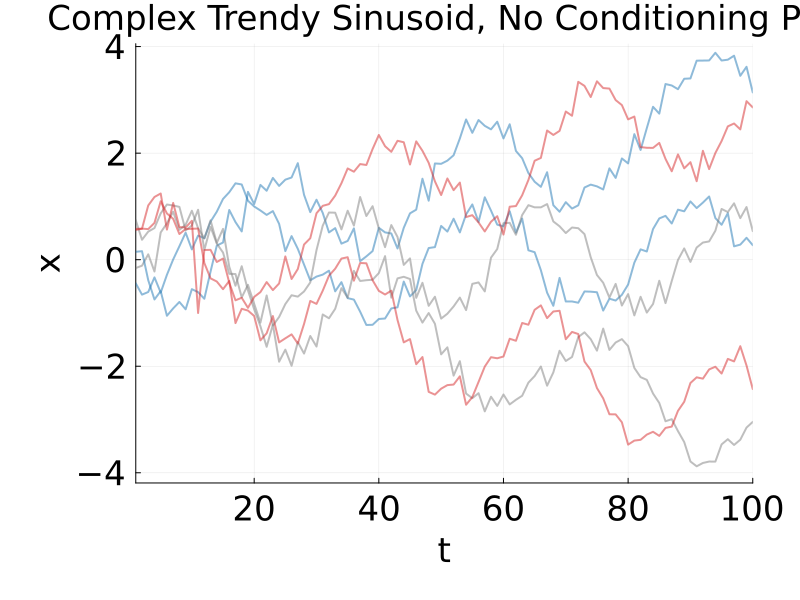

In [623]:
plot(trajectories_difficult[1, :], label="", alpha=0.5, c=pal[1], lw=2,
    title="Complex Trendy Sinusoid, No Conditioning Pts.", xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x_difficult, max_x_difficult),
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(800, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories_difficult[16, :], label="", c=pal[8], lw=2,alpha=0.5)
plot!(trajectories_difficult[58, :], label="", c=pal[1], lw=2,alpha=0.5)
plot!(trajectories_difficult[36, :], label="", c=pal[8], lw=2,alpha=0.5)
plot!(trajectories_difficult[85, :], label="", c=pal[4], lw=2,alpha=0.5)
plot!(trajectories_difficult[47, :], label="", c=pal[4], lw=2,alpha=0.5)

In [624]:
kde_vals_diff = []
x_vals_diff = []
for t in 1:size(trajectories_difficult, 2)
    kde_v = kde(trajectories_difficult[:, t]; boundary=(min_x_difficult, max_x_difficult), npoints=10_000)
    push!(kde_vals_diff, kde_v.density)
    push!(x_vals_diff, kde_v.x)
end
kde_matrix_diff = hcat(kde_vals_diff...)';
#kde_matrix[1, :] = zeros(size(kde_matrix, 2)) # conditionined on first point, so density will be peaked at a single value and skew the colour scale
#kde_matrix[1, :]
xval_matrix_diff = hcat(x_vals_diff...)';

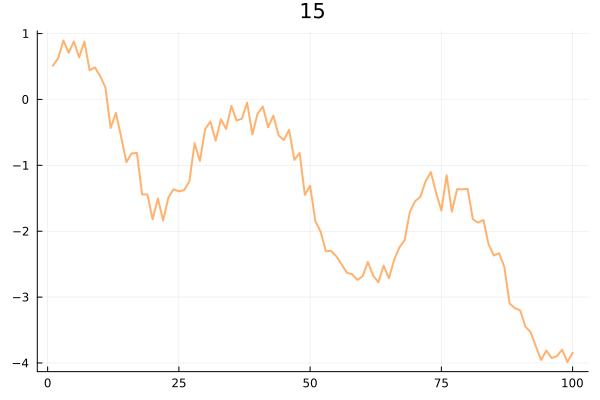

In [637]:
idx = rand(1:size(trajectories_difficult, 2))
plot(trajectories_difficult[idx, :], label="", c=pal[2], lw=2, alpha=0.6, title=idx)

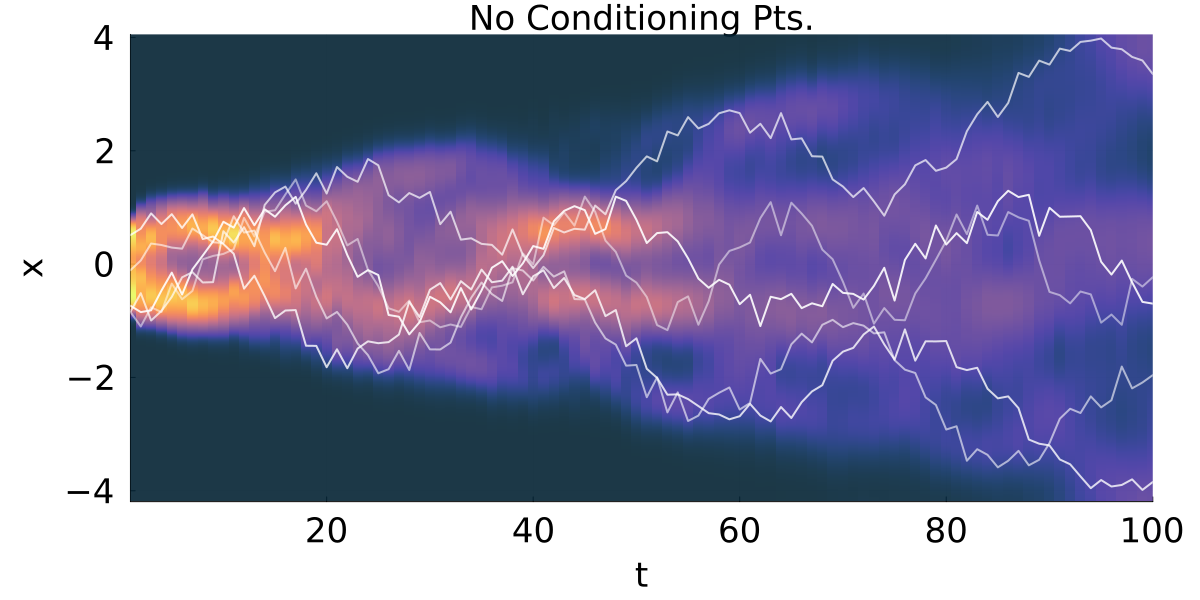

In [644]:
fstyle = font("sans-serif", 23)
heatmap(collect(1:100), xval_matrix_diff[1, :], kde_matrix_diff', c=:thermal, 
    alpha=0.9, colorbar=:none, xlabel="t", ylabel="x", xlims=(1, 100), ylims=(min_x_difficult, max_x_difficult),
    title="No Conditioning Pts.",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    size=(1200, 600),
    left_margin=10mm,
    right_margin=10mm,
    bottom_margin=10mm)
plot!(trajectories_difficult[74, :], label="", c=:white, lw=2, alpha=0.5)
plot!(trajectories_difficult[66, :], label="", c=:white, lw=2, alpha=0.6)
plot!(trajectories_difficult[23, :], label="", c=:white, lw=2, alpha=0.7)
plot!(trajectories_difficult[15, :], label="", c=:white, lw=2, alpha=0.8)
plot!(trajectories_difficult[95, :], label="", c=:white, lw=2, alpha=0.9)
#savefig("./complex_trendy_sinusoid_no_cond_pts_heatmap_style1.svg")

---

# ECG Data